In [26]:
# Load packages
library(dplyr)
library(rmweather)
library(ranger)
library(ggplot2)
library(jsonlite)


In [64]:
#This function takes as input 1 station and performs timeseries normalization 
# in selected chemicals. It returns a tibble df 

normalize <- function(station) {
    data <- read.csv(
        paste("../01-data/processed/aq_weather_by_station/",station,".csv",sep=""),
        header = TRUE,
        encoding = "UTF-8"
    )
    data$date <- as.POSIXct(data$time,format="%Y-%m-%d %H:%M:%S+00:00",tz="UTC")
    
    indicators <- c('no2_ug_m3','no_ug_m3','co_ug_m3', 'pm10_ug_m3', 'pm25_ug_m3', 'o3_ug_m3','co_mg_m3')
    weather_vars <- c(
        "day_julian","u_wind_component_100m", "v_wind_component_100m", 
        "u_wind_component_10m", "v_wind_component_10m", 
        "temperature", "mean_sea_level_pressure", 
         "surface_pressure", "total_precipitation"
    )

    normalized_df = data.frame(matrix(NA, nrow = dim(data)[1]))
    names(normalized_df) <- "date"
    normalized_df$date <- data$date
                               
    for (variable_to_normalize in indicators){
        
        if(!(variable_to_normalize %in% colnames(data))){
            # logging the missing variable
            print(paste("The variable ",variable_to_normalize," is not in the dataframe",station))
            next
        }
                
        weather_data_prepared <- rmw_prepare_data(data,value = variable_to_normalize)
        
        list_normalised <- rmw_do_all(
            weather_data_prepared,
            variables = weather_vars,
            n_trees = 300,
            n_samples = 350,
            verbose = FALSE
        )
        # Una vez lo de arriba este completado guardar el dataframe normalizado como csv
        normalized_var_df = list_normalised$normalised
        names(normalized_var_df) <- c("date",variable_to_normalize)
        normalized_df = merge(normalized_df,normalized_var_df,by="date")
        
    }
    # write the normalized dataframe to csv
    fname <- paste("../01-data/processed/normalized/",station,"-normalized.csv",sep="")
    write.csv(normalized_df,fname, row.names = FALSE)
    fname <- paste("../01-data/processed/normalized/",station,"-model_stats.json",sep="")
    paste("Dataframe for station ",station," has been normalized and saved to csv",fname)
    return(normalized_df)
}

In [65]:
stations_dfs_csv <- c(
    'aq_weather_arturo_soria','aq_weather_villaverde_alto',
    'aq_weather_vallecas','aq_weather_urb_embajada_(barajas)',
    'aq_weather_tres_olivos','aq_weather_sanchinarro','aq_weather_retiro',
    'aq_weather_pza_del_carmen','aq_weather_pza_de_espana',
    'aq_weather_pza_castilla','aq_weather_plaza_eliptica',
    'aq_weather_parque_juan_carlos_i','aq_weather_po_castellana',
    'aq_weather_moratalaz', 'aq_weather_escuelas_aguirre',
    'aq_weather_ensanche_vallecas','aq_weather_el_pardo',
    'aq_weather_cuatro_caminos','aq_weather_casa_de_campo',
    'aq_weather_c__farolillo','aq_weather_barrio_del_pilar',
    'aq_weather_barajas','aq_weather_av_ramon_y_cajal','aq_weather_mendez_alvaro'
)

for (station in stations_dfs_csv){
    #normalize each dataframe of air quality stations
    normalize(station)
}

#### **For 1 station (testing 1 chemical)**

In [7]:
dataset = "aq_weather_pza_de_espana"
var_to_normalize = "no2_ug_m3"

data = read.csv(paste("../01-data/processed/aq_weather_by_station/",dataset,".csv",sep=""),header = TRUE)
data$date <- as.POSIXct(data$time,format="%Y-%m-%d %H:%M:%S+00:00",tz="UTC")
head(data)

,time,co_mg_m3,no2_ug_m3,no_ug_m3,nox_ug_m3,so2_ug_m3,u_wind_component_100m,v_wind_component_100m,u_wind_component_10m,v_wind_component_10m,temperature,mean_sea_level_pressure,surface_pressure,total_precipitation,date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2014-01-01 00:00:00+00:00,0.2,14,3,18,4,3.021074,3.321069,1.0920015,1.607661,5.525807,102198.9,94676.34,1.018862e-05,2014-01-01 00:00:00
2,2014-01-01 01:00:00+00:00,0.3,38,11,56,4,3.168707,3.252658,1.2361109,1.523966,5.636244,102192.0,94672.59,5.849024e-06,2014-01-01 01:00:00
3,2014-01-01 02:00:00+00:00,0.3,46,15,69,9,3.280403,3.085065,1.2667950,1.441151,5.564362,102165.7,94650.26,1.018862e-05,2014-01-01 02:00:00
4,2014-01-01 03:00:00+00:00,0.3,32,9,47,5,2.941430,3.433016,1.0545457,1.742758,5.991732,102125.5,94614.03,7.610021e-06,2014-01-01 03:00:00
5,2014-01-01 04:00:00+00:00,0.2,20,5,28,4,2.605695,3.888330,0.9203822,1.956497,6.074723,102065.9,94556.69,2.955958e-06,2014-01-01 04:00:00
6,2014-01-01 05:00:00+00:00,0.2,19,3,25,4,2.566845,3.869672,0.9565682,1.970995,6.136803,102031.2,94524.20,5.094311e-06,2014-01-01 05:00:00


In [10]:
indicators <- c('no2_ug_m3','no_ug_m3','co_ug_m3', 'pm10_ug_m3', 'pm25_ug_m3', 'o3_ug_m3','co_mg_m3')
weather_vars <- c(
    "day_julian","u_wind_component_100m", "v_wind_component_100m", 
    "u_wind_component_10m", "v_wind_component_10m", 
    "temperature", "mean_sea_level_pressure", 
    "surface_pressure", "total_precipitation"
)
weather_data_prepared <- rmw_prepare_data(data,value = var_to_normalize)
list_normalised <- rmw_do_all(
    weather_data_prepared,
    variables = weather_vars,
    n_trees = 300,
    n_samples = 350,
    verbose = FALSE
)

head(list_normalised$normalised)

date,value_predict
<dttm>,<dbl>
2014-01-01 00:00:00,40.12197
2014-01-01 01:00:00,37.67698
2014-01-01 02:00:00,39.51634
2014-01-01 03:00:00,40.03785
2014-01-01 04:00:00,40.38129
2014-01-01 05:00:00,41.18664


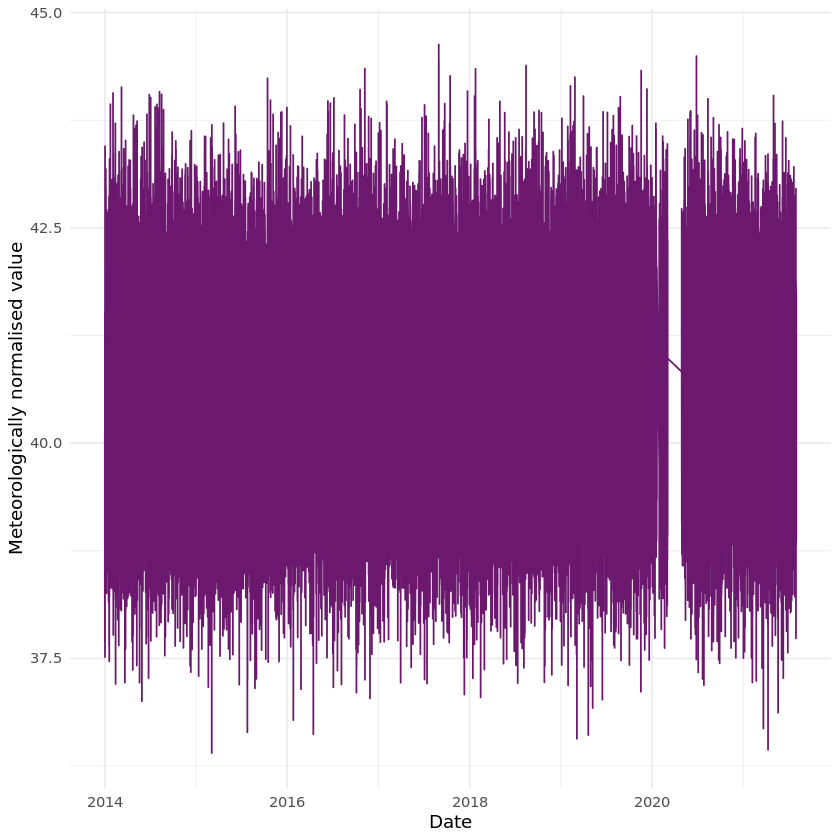

In [25]:
rmw_plot_normalised(list_normalised$normalised)